### COURSE NAME : DSE302 (DSML)
###   INSTRUCTOR : TANMAY BASU

##                               PROJECT  TITLE     :       CREDIT CARD FRAUD DETECTION(PROJ. 10)

## GROUP MEMBERS : 
  ####  1. ABHAY KUMAR  19354                                                                 
  ####  2. RISHABH SINGH 19243                    

Importing the Dependencies

In [1]:
pip install plotly


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import pandas as pd 
import sklearn 
from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing,cross_validation, svm
from sklearn.datasets import load_boston
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

C:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [6]:
pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


In [7]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [8]:
## reading two csv files 
d1 = pd.read_csv("credit_data.csv")
d2 = pd.read_csv("train_data_classlabels.csv")

In [9]:
# reading testing data
test_d3 = pd.read_csv("testing_data.csv")

In [10]:
d1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,0.122070,1.180854,1.294552,0.965842,0.386770,0.144288,0.304200,-0.849958,0.344590,0.012788,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,-0.822925,-0.033498,0.110720,0.221035,1.033650,0.349529,-0.567493,-0.003090,-0.090979,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,-0.783621,2.044352,-2.411191,0.859150,1.719712,-0.251797,0.614530,0.106303,0.920225,0.057436,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,-0.764514,0.059234,-2.476659,1.270913,1.837602,0.555147,-0.245037,1.363334,0.467089,0.059746,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,0.284519,-0.154564,-0.621986,-0.828913,0.053495,1.175946,-0.556466,-0.229089,0.035144,0.347816,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [11]:
#using merge function 
new = pd.concat([d1,d2], axis=1)
print (new.head(10))

    Time        V1        V2        V3        V4        V5        V6  \
0  50920  1.086640  0.148385  0.120522  0.974415 -0.035925 -0.406007   
1  34737  1.294054  0.152664  0.195524  0.540694 -0.267245 -0.691144   
2  11090 -0.352305  0.614321  2.000903 -0.403523 -0.409279 -0.395518   
3  23194 -2.049784  1.004759  1.726403  1.600998 -1.121759  0.421037   
4  38531 -0.289738  0.880936  1.787349  0.887265  0.125174 -0.845201   
5  50755  0.146002 -0.312264  0.759204 -1.212388 -1.376505  0.285221   
6  10634 -0.415566  1.128311  1.693093  0.177198 -0.048174 -0.844894   
7  28473  1.143437 -0.085305  1.236646  2.826180 -0.828799  0.601622   
8  48948 -0.343240  0.640055  2.341525  0.748648 -0.530062 -0.083694   
9  32177  0.988999 -0.112511  0.700514  1.193815 -0.556194 -0.019674   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.270339 -0.139679 -0.411854  0.122070  1.180854  1.294552  0.965842   
1  0.001673 -0.175527  0.179203 -0.032250 -0.822925 -0.03

In [12]:
# first 5 rows of the dataset
new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,0.122070,1.180854,1.294552,0.965842,0.386770,0.144288,0.304200,-0.849958,0.344590,0.012788,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10,0.0
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,-0.822925,-0.033498,0.110720,0.221035,1.033650,0.349529,-0.567493,-0.003090,-0.090979,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95,0.0
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,-0.783621,2.044352,-2.411191,0.859150,1.719712,-0.251797,0.614530,0.106303,0.920225,0.057436,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95,0.0
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,-0.764514,0.059234,-2.476659,1.270913,1.837602,0.555147,-0.245037,1.363334,0.467089,0.059746,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60,0.0
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,0.284519,-0.154564,-0.621986,-0.828913,0.053495,1.175946,-0.556466,-0.229089,0.035144,0.347816,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54,0.0


In [13]:
new['V1']

0        1.086640
1        1.294054
2       -0.352305
3       -2.049784
4       -0.289738
           ...   
57111    0.458761
57112    0.954816
57113   -0.926829
57114    0.939876
57115    1.591900
Name: V1, Length: 57116, dtype: float64

In [14]:
new.tail(200000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,0.122070,1.180854,1.294552,0.965842,0.386770,0.144288,0.304200,-0.849958,0.344590,0.012788,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10,0.0
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,-0.822925,-0.033498,0.110720,0.221035,1.033650,0.349529,-0.567493,-0.003090,-0.090979,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95,0.0
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,-0.783621,2.044352,-2.411191,0.859150,1.719712,-0.251797,0.614530,0.106303,0.920225,0.057436,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95,0.0
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,-0.764514,0.059234,-2.476659,1.270913,1.837602,0.555147,-0.245037,1.363334,0.467089,0.059746,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60,0.0
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,0.284519,-0.154564,-0.621986,-0.828913,0.053495,1.175946,-0.556466,-0.229089,0.035144,0.347816,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,0.415683,-0.850408,-0.383996,-0.457837,0.269379,0.094612,-1.700238,0.368616,0.780434,-0.615125,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74,0.0
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,-0.399419,0.983344,1.712002,0.822692,-0.502035,-0.810946,-0.148445,0.005787,-0.572730,0.482504,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12,0.0
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,-1.323822,-1.014995,0.400769,-0.571159,-1.132299,-1.433173,-0.852031,0.894782,-0.798533,0.205443,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00,0.0
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,0.015851,1.275844,1.070128,-0.649894,0.376730,-0.753924,-0.555960,0.113693,-0.481653,-0.180180,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90,0.0


In [15]:
total = new.isnull().sum().sort_values(ascending = False)
percent = (new.isnull().sum()/new.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# dataset informations
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57116 entries, 0 to 57115
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57116 non-null  int64  
 1   V1      57116 non-null  float64
 2   V2      57116 non-null  float64
 3   V3      57116 non-null  float64
 4   V4      57116 non-null  float64
 5   V5      57116 non-null  float64
 6   V6      57116 non-null  float64
 7   V7      57116 non-null  float64
 8   V8      57116 non-null  float64
 9   V9      57116 non-null  float64
 10  V10     57116 non-null  float64
 11  V11     57116 non-null  float64
 12  V12     57116 non-null  float64
 13  V13     57116 non-null  float64
 14  V14     57116 non-null  float64
 15  V15     57116 non-null  float64
 16  V16     57116 non-null  float64
 17  V17     57116 non-null  float64
 18  V18     57116 non-null  float64
 19  V19     57116 non-null  float64
 20  V20     57116 non-null  float64
 21  V21     57116 non-null  float64
 22

### READING TEST DATA

In [17]:
d1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,0.122070,1.180854,1.294552,0.965842,0.386770,0.144288,0.304200,-0.849958,0.344590,0.012788,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,-0.822925,-0.033498,0.110720,0.221035,1.033650,0.349529,-0.567493,-0.003090,-0.090979,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,-0.783621,2.044352,-2.411191,0.859150,1.719712,-0.251797,0.614530,0.106303,0.920225,0.057436,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,-0.764514,0.059234,-2.476659,1.270913,1.837602,0.555147,-0.245037,1.363334,0.467089,0.059746,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,0.284519,-0.154564,-0.621986,-0.828913,0.053495,1.175946,-0.556466,-0.229089,0.035144,0.347816,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [18]:
d1.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,0.415683,-0.850408,-0.383996,-0.457837,0.269379,0.094612,-1.700238,0.368616,0.780434,-0.615125,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,-0.399419,0.983344,1.712002,0.822692,-0.502035,-0.810946,-0.148445,0.005787,-0.572730,0.482504,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,-1.323822,-1.014995,0.400769,-0.571159,-1.132299,-1.433173,-0.852031,0.894782,-0.798533,0.205443,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,0.015851,1.275844,1.070128,-0.649894,0.376730,-0.753924,-0.555960,0.113693,-0.481653,-0.180180,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90
57115,52909,1.591900,-0.850352,-0.434399,-1.617696,-0.773801,-0.653197,-0.621472,-0.194046,-2.318691,1.690558,0.515413,-0.794299,-0.198135,0.241750,-0.310601,-0.352478,0.199221,0.538403,0.431802,-0.376931,-0.181145,-0.149442,-0.159295,-0.363457,0.727830,-0.054879,-0.009193,-0.014170,0.01


In [19]:
test_d3['V1']

0       -0.839499
1       -1.560421
2       -0.216150
3       -0.543125
4        0.887965
           ...   
14275   -1.026431
14276   -6.446671
14277   -0.636005
14278    0.460469
14279   -0.385508
Name: V1, Length: 14280, dtype: float64

In [20]:
total = test_d3.isnull().sum().sort_values(ascending = False)
percent = (test_d3.isnull().sum()/new.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Amount,V28,V27,V26,V1,V25,V24,V23,V22,V21,V20,V19,V18,V17,V16,Time,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,V15,Class
Total,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Percent,0.001751,0.001751,0.001751,0.001751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [21]:
temp = new["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [22]:
class_0 = new.loc[new['Class'] == 0]["Time"]
class_1 = new.loc[new['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [23]:
new['Hour'] = new['Time'].apply(lambda x: np.floor(x / 3600))

tmp = new.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0.0,0.0,7712.43,3220,209563.86,65.081944,13.295,50247.753189
1,0.0,1.0,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0.0,0.0,1769.69,1802,120522.53,66.882647,22.615,21442.873880
3,1.0,1.0,59.0,59.00,1,59.00,59.000000,59.000,NaN
4,2.0,0.0,0.0,4002.88,1254,82540.06,65.821419,16.990,40543.281711


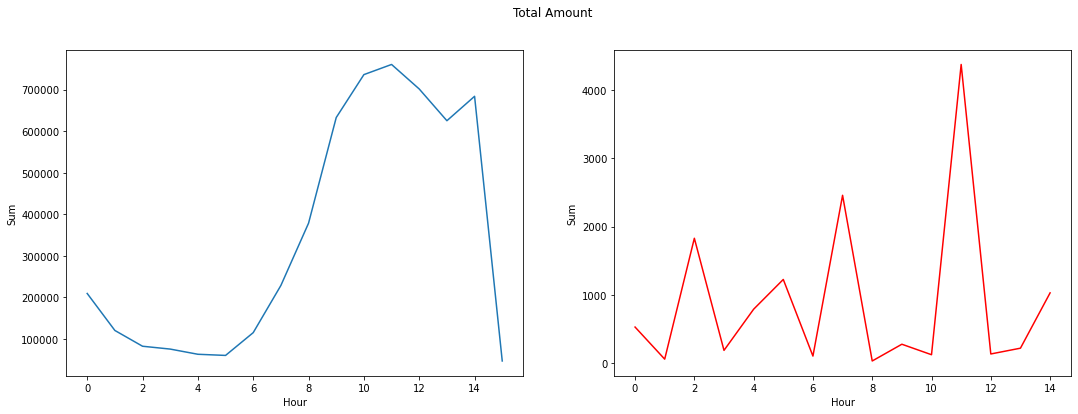

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

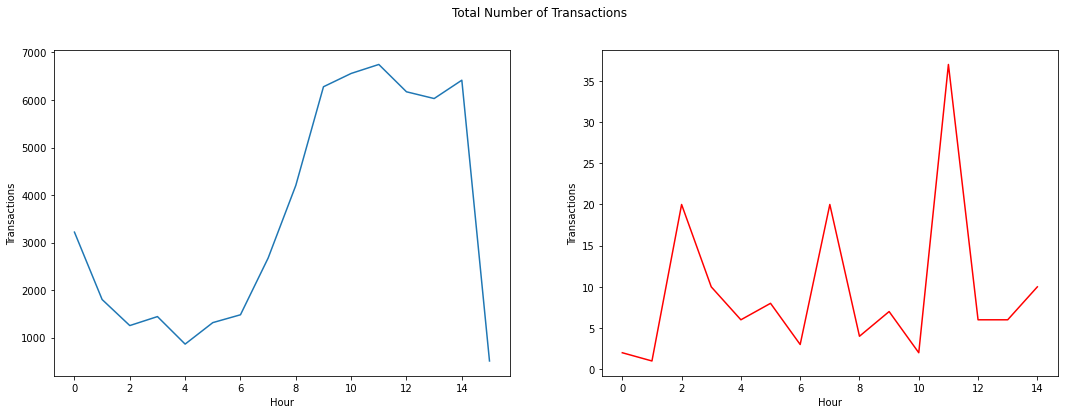

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

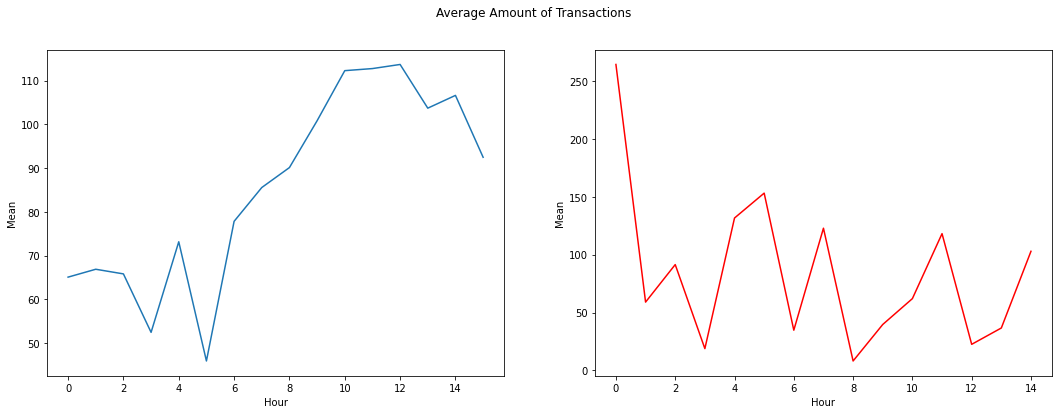

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

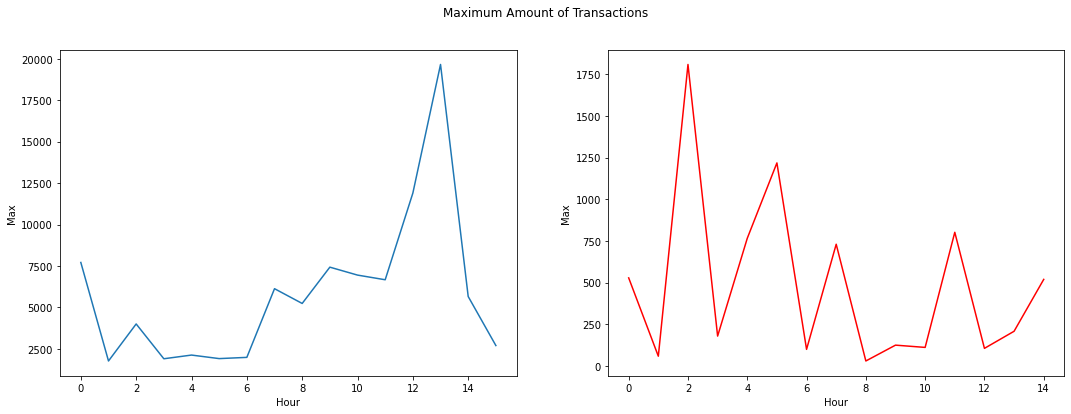

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

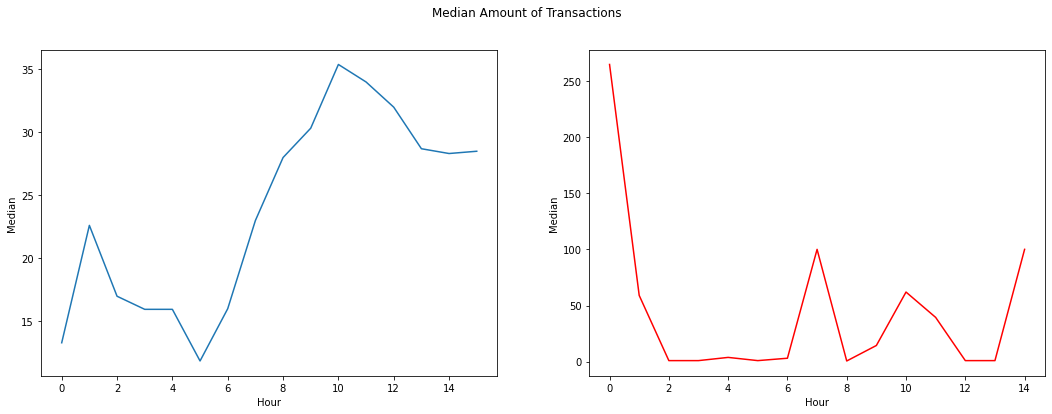

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

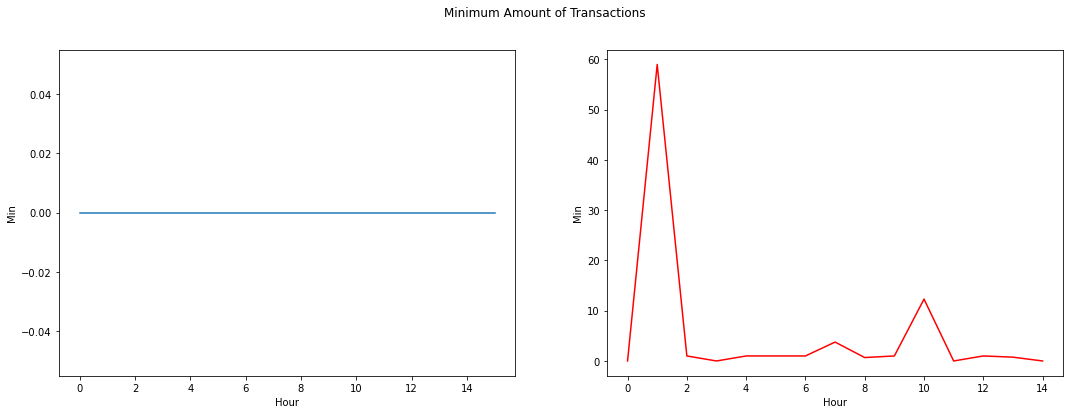

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

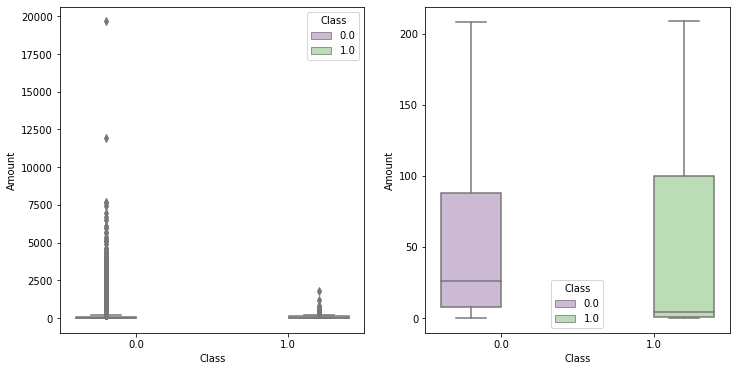

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=new, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=new, palette="PRGn",showfliers=False)
plt.show();

In [31]:
tmp = new[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    56974.000000
mean        96.947941
std        270.511706
min          0.000000
25%          7.610000
50%         26.315000
75%         87.935000
max      19656.530000
Name: Amount, dtype: float64

In [32]:
class_1.describe()

count     142.000000
mean       94.179930
std       227.637806
min         0.000000
25%         1.000000
50%         3.860000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [33]:
fraud = new.loc[new['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(192, 255, 203)',
                line=dict(
                    color='green',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

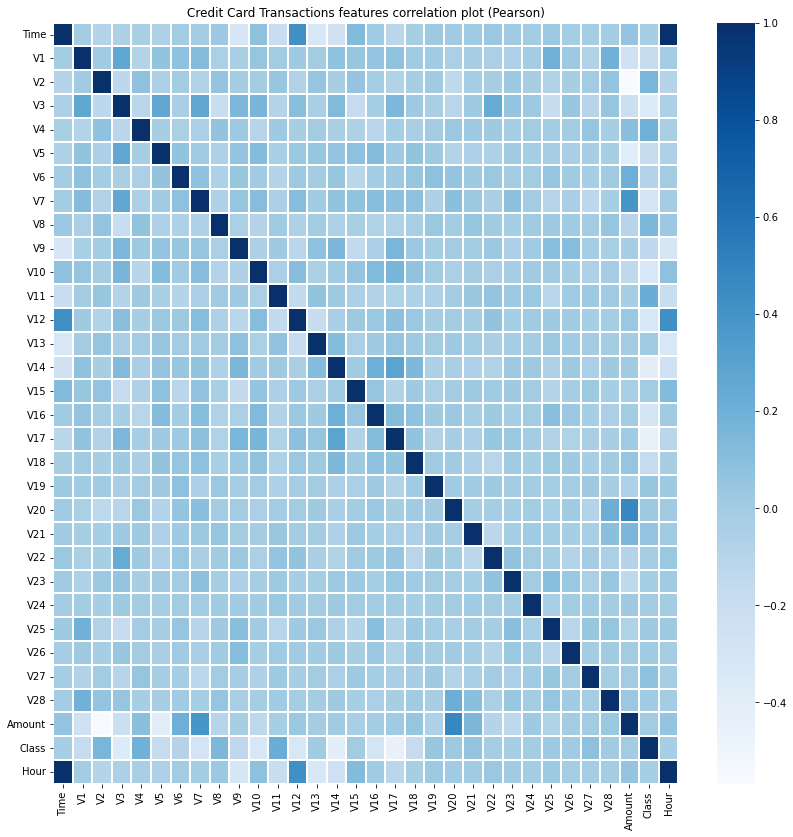

In [34]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = new.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

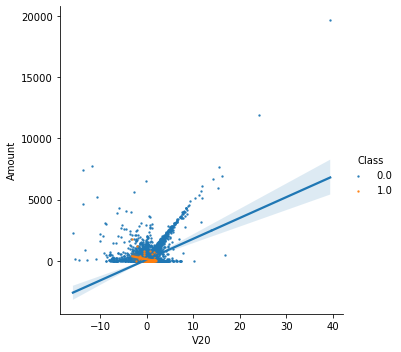

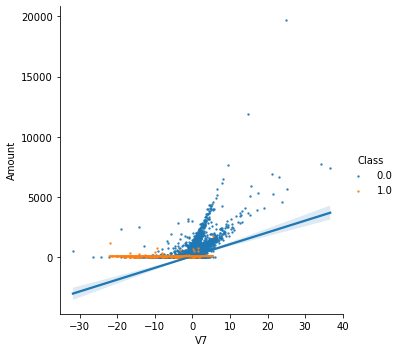

In [35]:
s = sns.lmplot(x='V20', y='Amount',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

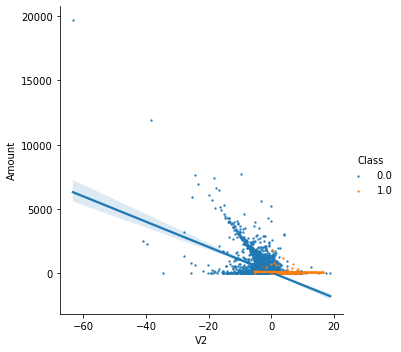

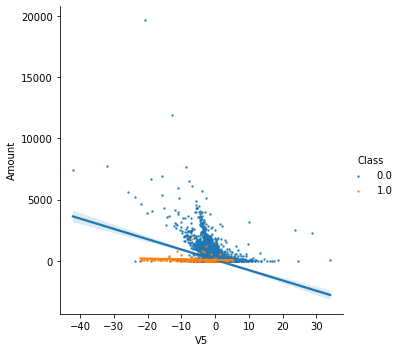

In [36]:
s = sns.lmplot(x='V2', y='Amount',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\A

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\A

<Figure size 432x288 with 0 Axes>

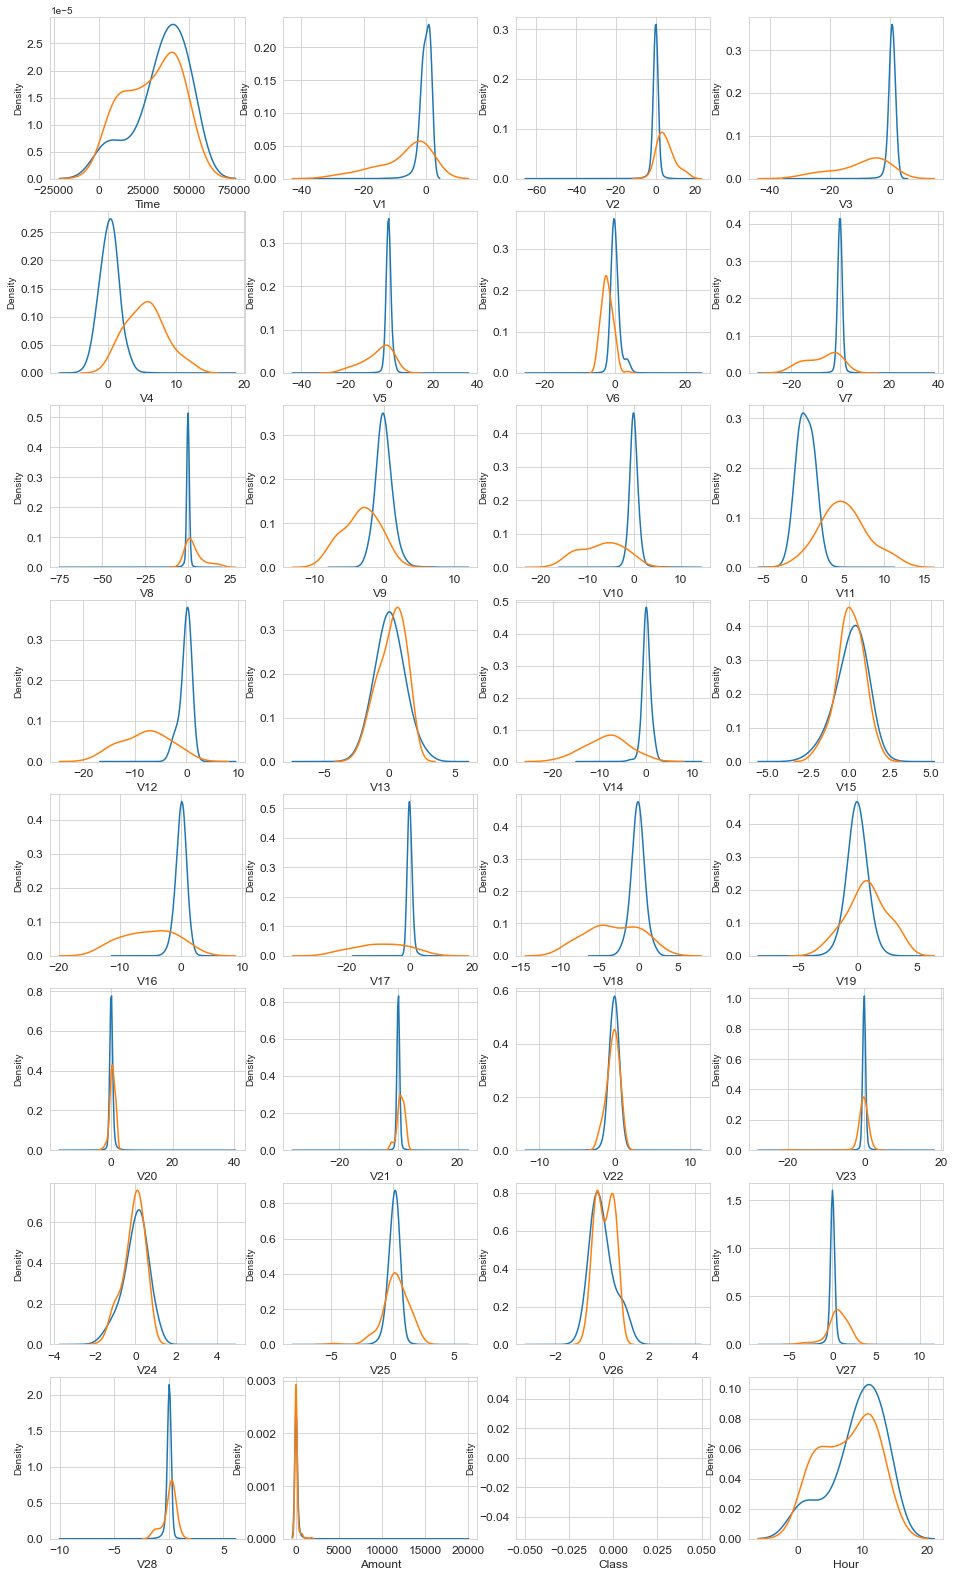

In [37]:
var = new.columns.values

i = 0
t0 = new.loc[new['Class'] == 0]
t1 = new.loc[new['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [38]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [39]:
train_new, test_new = train_test_split(new, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_new, valid_new = train_test_split(train_new, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import cross_val_score

# KNN CLASSIFIERS

In [41]:
Fraud= new[new['Class']==1]
Valid= new[new['Class']==0]

Outlier_Fraction= len(Fraud)/len(Valid)
print(Outlier_Fraction)

print('Valid Cases:{}'.format(len(Valid)))
print('Fraud Cases:{}'.format(len(Fraud)))

0.002492364938392951
Valid Cases:56974
Fraud Cases:142


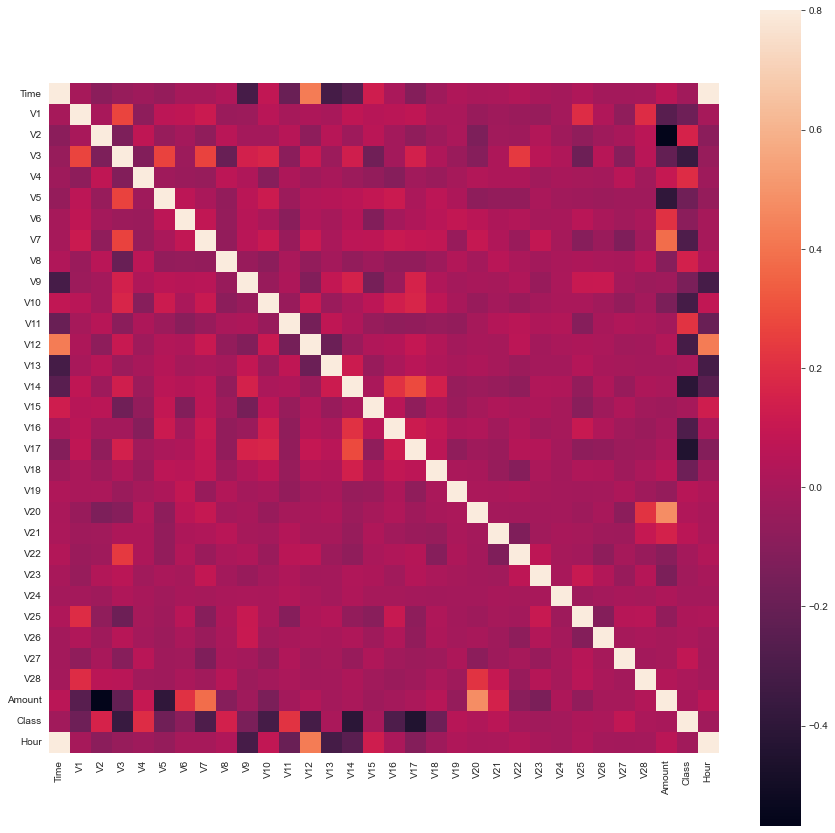

In [42]:
#lets check correlation matrix
corrl= new.corr()
fig= plt.figure(figsize=(15,15))

sns.heatmap(corrl, vmax=0.8 ,square=True)
plt.show()


In [152]:
#getting all the columns from the dataframe
columns= new.columns.tolist()

#filtering the data that is not relevent to data
columns=[c for c in columns if c not in ['Class']]

#storing the variable that we will be predicting on
target = 'Class'

X= new[columns]
Y= new[target]

print(X.shape)
print(Y.shape)

(57116, 31)
(57116,)


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import metrics

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
for k in range(10):
    K_value = k+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"% for K-Value:",K_value)

Accuracy is  99.72864145658264 % for K-Value: 1
Accuracy is  99.70238095238095 % for K-Value: 2
Accuracy is  99.70238095238095 % for K-Value: 3
Accuracy is  99.68487394957984 % for K-Value: 4
Accuracy is  99.68487394957984 % for K-Value: 5
Accuracy is  99.68487394957984 % for K-Value: 6
Accuracy is  99.68487394957984 % for K-Value: 7
Accuracy is  99.67612044817928 % for K-Value: 8
Accuracy is  99.67612044817928 % for K-Value: 9
Accuracy is  99.67612044817928 % for K-Value: 10


In [50]:
precision_score(Y_test, Y_pred, average='micro')

0.9967612044817927

In [54]:
recall_score(Y_test, Y_pred, average='micro')

0.9967612044817927

# Random Forest Classifier

In [55]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [56]:
clf.fit(train_new[predictors], train_new[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [58]:
preds = clf.predict(valid_new[predictors])

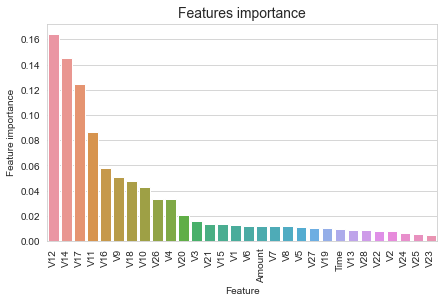

In [59]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### Confusion Matrix

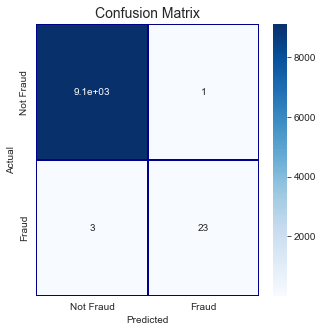

In [60]:
cm = pd.crosstab(valid_new[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [61]:
roc_auc_score(valid_new[target].values, preds)

0.9422528256337099

In [62]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [63]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [64]:
accuracy_score(valid_new[target].values, preds)

0.9995623153517891

In [107]:
recall_score(Y_test, Y_pred, average='micro')

0.9967612044817927

### Checking classifier on test data

In [111]:
preds = clf.predict(test_d3[predictors])

In [112]:
print(preds)

[0. 0. 0. ... 0. 0. 0.]


In [113]:
labels = open("class labels.txt", "w+")
for i in range(len(preds)):
    labels.write(str(preds[i]) + "\n")
labels.close()


# Adaptive Boosting Classifier(Ada Boost)

In [114]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [115]:
clf.fit(train_new[predictors], train_new[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [116]:
preds = clf.predict(valid_new[predictors])

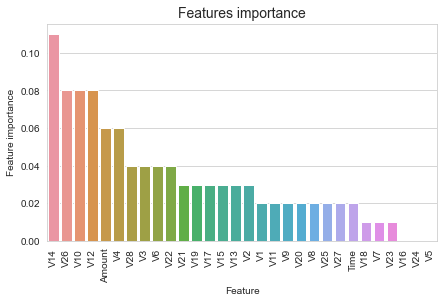

In [117]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### Confusion Matrix

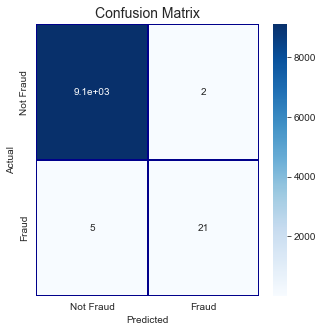

In [118]:
cm = pd.crosstab(valid_new[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [119]:
recall_score(Y_test, Y_pred, average='weighted')

0.9967612044817927

In [120]:
roc_auc_score(valid_new[target].values, preds)

0.9037364204981895

In [121]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [122]:
precision_score(Y_test, Y_pred, average='micro')

0.9967612044817927

In [123]:
accuracy_score(valid_new[target].values, preds)

0.9992340518656309

# CatBoostClassifier

In [124]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [125]:
clf.fit(train_new[predictors], train_new[target].values,verbose=True)

0:	total: 267ms	remaining: 2m 13s
50:	total: 14.7s	remaining: 2m 9s
100:	total: 30s	remaining: 1m 58s
150:	total: 44.3s	remaining: 1m 42s
200:	total: 58.7s	remaining: 1m 27s
250:	total: 1m 12s	remaining: 1m 12s
300:	total: 1m 27s	remaining: 57.7s
350:	total: 1m 41s	remaining: 43.1s
400:	total: 1m 56s	remaining: 28.7s
450:	total: 2m 10s	remaining: 14.2s
499:	total: 2m 25s	remaining: 0us


In [126]:
preds = clf.predict(valid_new[predictors])

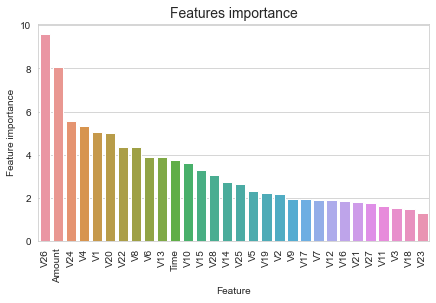

In [127]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Confusion Matrix

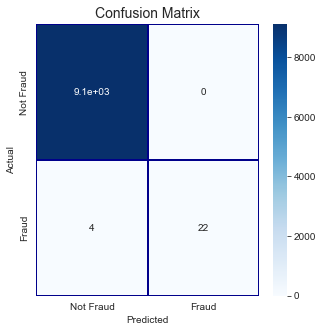

In [128]:
cm = pd.crosstab(valid_new[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [129]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [130]:
roc_auc_score(valid_new[target].values, preds)

0.9230769230769231

In [131]:
accuracy_score(Y_test, Y_pred)


0.9967612044817927

In [132]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

# XGBoost

In [133]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_new[predictors], train_new[target].values)
dvalid = xgb.DMatrix(valid_new[predictors], valid_new[target].values)
dtest = xgb.DMatrix(test_new[predictors], test_new[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

C:\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [134]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[22:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.93210	valid-auc:0.94222
[50]	train-auc:0.95284	valid-auc:0.94198


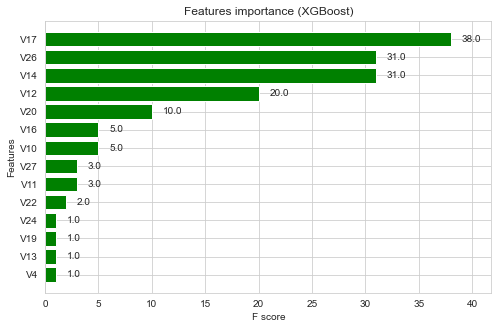

In [135]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [136]:
preds = model.predict(dtest)

In [137]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [138]:
roc_auc_score(test_new[target].values, preds)

0.9244431778323396

In [139]:
accuracy_score(Y_test, Y_pred)

0.9967612044817927

In [140]:
precision_score(Y_test, Y_pred, average='macro')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.49838060224089636

# LightGBM

In [141]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [142]:
dtrain = lgb.Dataset(train_new[predictors].values, 
                     label=train_new[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_new[predictors].values,
                     label=valid_new[target].values,
                     feature_name=predictors)

In [143]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning:

'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002724 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.999762	valid's auc: 0.969285
[100]	train's auc: 0.999969	valid's auc: 0.971651
[150]	train's auc: 1	valid's auc: 0.972938
[200]	train's auc: 1	valid's auc: 0.977973
[250]	train's auc: 1	valid's auc: 0.984498
[300]	train's auc: 1	valid's auc: 0.985752
[350]	train's auc: 1	valid's auc: 0.986933
[400]	train's auc: 1	valid's auc: 0.987921
[450]	train's auc: 1	valid's auc: 0.988651
[500]	train's auc: 1	valid's auc: 0.989183
[550]	train's auc: 1	valid's auc: 0.989668
[600]	train's auc: 1	valid's auc: 0.989972
[650]	train's auc: 1	valid's auc: 0.989065
[700]	train's auc: 1	valid's auc: 0.988917
Early stopping, best iteration is:
[604]	train's auc: 1	valid's auc: 0.990419


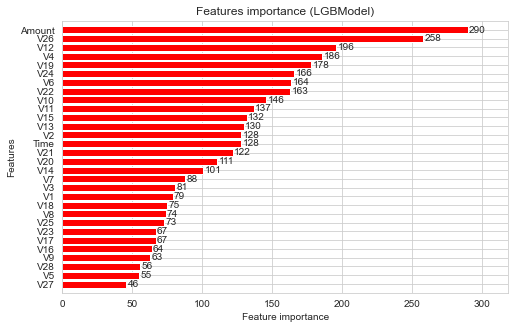

In [144]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LGBModel)", ax=ax,color="red") 
plt.show()

In [145]:
preds = model.predict(test_new[predictors])


In [146]:
precision_score(Y_test, Y_pred, average='weighted')

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9935328987599942

In [147]:
roc_auc_score(test_new[target].values, preds)

0.9782839354612417

In [148]:
accuracy_score(Y_test, Y_pred)

0.9967612044817927

In [149]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_new.shape[0])
test_preds = np.zeros(test_new.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_new):
    train_x, train_y = train_new[predictors].iloc[train_idx],train_new[target].iloc[train_idx]
    valid_x, valid_y = train_new[predictors].iloc[valid_idx],train_new[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_new[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_new[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score) 

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[50]	training's auc: 0.5	valid_1's auc: 0.5
Fold  1 AUC : 0.500000


C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecat

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[50]	training's auc: 0.5	valid_1's auc: 0.5
Fold  2 AUC : 0.500000
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[50]	training's auc: 0.860002	valid_1's auc: 0.800941
Fold  3 AUC : 0.802650
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

C:\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecat

[50]	training's auc: 0.5	valid_1's auc: 0.5
Fold  4 AUC : 0.500000
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[50]	training's auc: 0.5	valid_1's auc: 0.5
Fold  5 AUC : 0.500000
Full AUC score 0.470770


In [150]:
accuracy_score(Y_test, Y_pred)

0.9967612044817927

In [151]:
precision_score(Y_test, Y_pred, average='micro')

0.9967612044817927